# Import lib

In [103]:
import pandas as pd
import numpy as np
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

In [2]:
loan=pd.read_csv("df.csv")
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,initial_list_status,out_prncp,total_rec_late_fee,recoveries,last_pymnt_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,hardship_flag,debt_settlement_flag
0,100.000000,60,4.419276,D,4.0,OWN,228.035085,Source Verified,2016-03-01,Fully Paid,n,other,GA,3.872983,0.0,1.0,4.0,2.0,35.9,w,0.000000,0.0,0.0,03-2016,0.0,Individual,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,N,N
1,187.082869,60,4.555217,E,3.0,MORTGAGE,291.547595,Source Verified,2016-03-01,Fully Paid,n,debt_consolidation,NY,4.998000,0.0,1.0,9.0,0.0,46.6,w,0.000000,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,N,N
2,141.421356,60,3.026549,B,1.0,MORTGAGE,277.488739,Not Verified,2016-03-01,Current,n,home_improvement,IL,3.708099,0.0,1.0,14.0,0.0,13.9,w,117.048751,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,N,N
3,132.193041,60,3.386739,B,6.0,MORTGAGE,204.161701,Verified,2016-03-01,Current,n,debt_consolidation,TX,5.482700,0.0,0.0,10.0,0.0,27.6,w,110.404846,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,N,N
4,89.442719,36,3.026549,B,10.0,RENT,268.328157,Source Verified,2016-03-01,Current,n,debt_consolidation,MD,4.757100,0.0,0.0,4.0,0.0,98.7,w,58.081408,0.0,0.0,03-2016,0.0,Individual,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,N,N


In [3]:
loan.dtypes

loan_amnt                     float64
term                            int64
int_rate                      float64
grade                          object
emp_length                    float64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_util                    float64
initial_list_status            object
out_prncp                     float64
total_rec_late_fee            float64
recoveries                    float64
last_pymnt_d                   object
collections_12_mths_ex_med    float64
application_type               object
acc_now_deli

# Convert into category datatype 

In [4]:
loan[["term","grade","emp_length","home_ownership","verification_status","loan_status","pymnt_plan","purpose","addr_state","initial_list_status","application_type","acc_now_delinq","hardship_flag","debt_settlement_flag"]]=loan[["term","grade","emp_length","home_ownership","verification_status","loan_status","pymnt_plan","purpose","addr_state","initial_list_status","application_type","acc_now_delinq","hardship_flag","debt_settlement_flag"]].astype("category")

In [5]:
loan_copy=loan

# Encoding 

In [6]:
loan=pd.get_dummies(loan,columns=["home_ownership","verification_status","issue_d","pymnt_plan","purpose","addr_state","initial_list_status","last_pymnt_d","application_type","hardship_flag","debt_settlement_flag"],drop_first=True)
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,100.000000,60,4.419276,D,4.0,228.035085,Fully Paid,3.872983,0.0,1.0,4.0,2.0,35.9,0.000000,0.0,0.0,0.0,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,187.082869,60,4.555217,E,3.0,291.547595,Fully Paid,4.998000,0.0,1.0,9.0,0.0,46.6,0.000000,0.0,0.0,0.0,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,141.421356,60,3.026549,B,1.0,277.488739,Current,3.708099,0.0,1.0,14.0,0.0,13.9,117.048751,0.0,0.0,0.0,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,132.193041,60,3.386739,B,6.0,204.161701,Current,5.482700,0.0,0.0,10.0,0.0,27.6,110.404846,0.0,0.0,0.0,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,89.442719,36,3.026549,B,10.0,268.328157,Current,4.757100,0.0,0.0,4.0,0.0,98.7,58.081408,0.0,0.0,0.0,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [7]:
loan.dtypes

loan_amnt                               float64
term                                   category
int_rate                                float64
grade                                  category
emp_length                             category
annual_inc                              float64
loan_status                            category
dti                                     float64
delinq_2yrs                             float64
inq_last_6mths                          float64
open_acc                                float64
pub_rec                                 float64
revol_util                              float64
out_prncp                               float64
total_rec_late_fee                      float64
recoveries                              float64
collections_12_mths_ex_med              float64
acc_now_delinq                         category
tot_coll_amt                            float64
tot_cur_bal                             float64
open_acc_6m                             

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
loan["grade"]=le.fit_transform(loan["grade"])
loan.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,100.000000,60,4.419276,3,4.0,228.035085,Fully Paid,3.872983,0.0,1.0,4.0,2.0,35.9,0.000000,0.0,0.0,0.0,0.0,622.0,126.039676,2.0,1.0,5.0,2.0,14809.0,99.0,0.0,88.0,3.0,0.0,2.0,40.286474,39.900000,0.0,0.0,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,187.082869,60,4.555217,4,3.0,291.547595,Fully Paid,4.998000,0.0,1.0,9.0,0.0,46.6,0.000000,0.0,0.0,0.0,0.0,0.0,402.048505,0.0,3.0,3.0,14.0,73863.0,83.0,1.0,71.0,5.0,1.0,2.0,69.519781,67.800000,0.0,0.0,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,141.421356,60,3.026549,1,1.0,277.488739,Current,3.708099,0.0,1.0,14.0,0.0,13.9,117.048751,0.0,0.0,0.0,0.0,0.0,158.211883,0.0,8.0,0.0,46.0,20827.0,38.0,3.0,30.0,1.0,0.0,2.0,146.598090,3.600000,0.0,0.0,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,132.193041,60,3.386739,1,6.0,204.161701,Current,5.482700,0.0,0.0,10.0,0.0,27.6,110.404846,0.0,0.0,0.0,0.0,0.0,344.075573,0.0,0.0,0.0,37.0,0.0,74.0,1.0,28.0,0.0,0.0,0.0,130.659864,20.400000,0.0,0.0,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,89.442719,36,3.026549,1,10.0,268.328157,Current,4.757100,0.0,0.0,4.0,0.0,98.7,58.081408,0.0,0.0,0.0,0.0,0.0,244.065565,0.0,3.0,3.0,9.0,39833.0,75.0,0.0,81.0,2.0,6.0,1.0,104.198771,59.762205,0.0,0.0,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [9]:
loan['loan_status'].replace(['Fully Paid', 'Current','In Grace Period','Late (16-30 days)','Default','Late (31-120 days)','Charged Off'], [0,0,0,1,1,1,1], inplace=True)

# Feature selection

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_main=loan.loc[:, loan.columns!="loan_status"]
y_main = loan.loc[:, loan.columns == 'loan_status']

In [12]:
X_main.describe()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
count,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,1.338890e+05,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.00000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000,133889.000000
mean,119.480591,3.467828,1.673513,271.876341,4.279049,0.343476,0.576498,12.119922,0.238705,51.929074,47.516755,1.362711e+00,108.131101,0.021256,259.246596,334.267599,1.045373,2.797147,1.625215,21.641175,35704.147819,71.176280,2.930006,60.654499,0.952476,1.543383,2.186169,85.338706,59.762205,0.010120,21.343172,1.671377,6.625765,0.518900,3.809477,8.703277,0.000911,0.090612,94.061616,0.130474,0.120951,0.379897,0.376633,0.271583,0.295237,0.463025,0.000710,0.240401,0.572780,0.064695,0.004071,0.021832,0.010882,0.005744,0.053268,0.00062,0.010404,0.005549,0.012085,0.007491,0.023632,0.136927,0.020442,0.014885,0.002136,0.002890,0.070469,0.032221,0.004788,0.002532,

In [13]:
feature=X_main[["loan_amnt","int_rate","annual_inc","dti","delinq_2yrs","open_acc","pub_rec","bc_open_to_buy","bc_util","revol_util","out_prncp","total_rec_late_fee","recoveries","tot_cur_bal","tot_coll_amt","total_bal_il","delinq_amnt"]]

In [14]:
feature_scale=list(feature.columns)

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_main[feature_scale]=ss.fit_transform(feature)

In [16]:
X_main.head()

,loan_amnt,term,int_rate,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
0,-0.537453,60,1.417657,3,4.0,-0.541819,-0.365133,-0.37804,1.0,-1.409115,2.650312,-0.662302,-0.994238,-0.133718,-0.181158,0.0,0.0,0.176770,-1.105081,2.0,1.0,5.0,2.0,-0.495642,99.0,0.0,88.0,3.0,0.0,2.0,-0.753524,-7.124747e-01,0.0,-0.023319,0.0,4.0,2.0,2.0,7.0,0.0,0.0,83.3,0.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1.865089,60,1.620208,4,3.0,0.243110,0.646477,-0.37804,1.0,-0.541425,-0.359192,-0.220191,-0.994238,-0.133718,-0.181158,0.0,0.0,-0.126331,0.359718,0.0,3.0,3.0,14.0,0.905144,83.0,1.0,71.0,5.0,1.0,2.0,-0.264580,2.883228e-01,0.0,-0.023319,1.0,5.0,0.0,3.0,9.0,0.0,0.0,100.0,0.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
2,0.605327,60,-0.657506,1,1.0,0.069362,-0.513396,-0.37804,1.0,0.326265,-0.359192,-1.571315,1.454884,-0.133718,-0.181158,0.0,0.0,-0.126331,-0.934341,0.0,8.0,0.0,46.0,-0.352892,38.0,3.0,30.0,1.0,0.0,2.0,1.024598,-2.014587e+00,0.0,-0.023319,0.0,3.0,0.0,2.0,9.0,0.0,0.0,100.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,0.350726,60,-0.120823,1,6.0,-0.836862,1.082318,-0.37804,0.0,-0.367887,-0.359192,-1.005248,1.315867,-0.133718,-0.181158,0.0,0.0,-0.126331,0.052052,0.0,0.0,0.0,37.0,-0.846918,74.0,1.0,28.0,0.0,0.0,0.0,0.758022,-1.411957e+00,0.0,-0.023319,1.0,5.0,0.0,5.0,4.0,0.0,0.0,100.0,0.0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,-0.828719,36,-0.657506,1,10.0,-0.043851,0.429861,-0.37804,0.0,-1.409115,-0.359192,1.932518,0.221054,-0.133718,-0.181158,0.0,0.0,-0.126331,-0.478709,0.0,3.0,3.0,9.0,0.097938,75.0,0.0,81.0,2.0,6.0,1.0,0.315445,-6.371947e-15,0.0,-0.023319,0.0,9.0,0.0,0.0,8.0,0.0,0.0,100.0,0.0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


# Balancing dataset

In [17]:
loan["loan_status"].value_counts(normalize=True)

0    0.86208
1    0.13792
Name: loan_status, dtype: float64

In [18]:
#It is highly imblance data

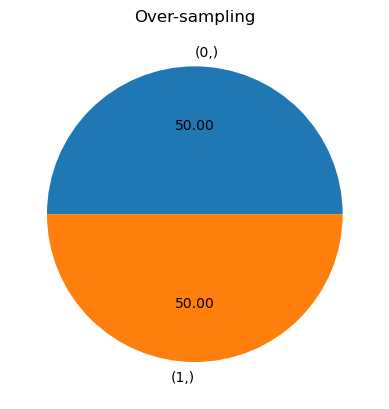

In [19]:
from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(sampling_strategy="not majority") # string
ros = RandomOverSampler(sampling_strategy=1) # float
X_res, y_res = ros.fit_resample(X_main, y_main)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [20]:
#resample all classes but the majority class

# Split data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_res,y_res,test_size=0.3,random_state=1)

In [23]:
X_train_1.describe()

,loan_amnt,int_rate,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_24m,all_util,inq_fi,total_cu_tl,inq_last_12m,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_il_tl,num_tl_120dpd_2m,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,pub_rec_bankruptcies,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,issue_d_2016-02-01,issue_d_2016-03-01,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,last_pymnt_d_01-2016,last_pymnt_d_02-2016,last_pymnt_d_03-2016,application_type_Joint App,hardship_flag_Y,debt_settlement_flag_Y
count,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000,161592.000000
mean,0.027604,0.262320,2.015960,-0.052484,0.092923,0.009554,0.657595,0.024714,0.029418,0.033895,-0.300274,0.145539,0.477125,0.023566,-0.000931,-0.063291,1.164675,2.867441,1.800027,19.862153,0.019240,72.679068,3.203034,62.205900,1.069935,1.566476,2.418214,-0.092685,0.042421,0.010675,0.004491,1.533189,6.291995,0.531474,3.861243,8.889054,0.000879,0.092932,94.024001,0.144029,0.120841,0.413814,0.380025,0.310195,0.298567,0.460184,0.002537,0.221317,0.589899,0.062447,0.004833,0.021548,0.011585,0.006640,0.054712,0.000637,0.011647,0.006238,0.012952,0.008447,0.023986,0.141356,0.019308,0.013107,0.001832,0.002717,0.071631,0.030156,0.004951,0.002494,0.039296,0.01716

# Mutual Information in classification

In [24]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_1, y_train_1)
mutual_info

array([1.79134533e-02, 1.19265084e-02, 6.74966844e-02, 6.44408769e-02,
       4.86990096e-03, 3.93235193e-02, 4.23861321e-02, 3.83561176e-03,
       1.07663804e-02, 1.99780528e-03, 4.80028650e-03, 8.77373891e-03,
       2.70989789e-01, 2.87324378e-02, 1.85240246e-01, 0.00000000e+00,
       0.00000000e+00, 2.33531823e-02, 3.21953133e-01, 9.50241128e-03,
       3.73049972e-03, 1.47448239e-02, 1.21375598e-02, 2.54550199e-01,
       6.73539921e-03, 1.36412430e-02, 8.34663998e-03, 6.56845680e-03,
       7.69322980e-04, 9.33624075e-03, 1.70044823e-01, 1.07842197e-02,
       2.20335158e-03, 3.59025940e-03, 6.89737523e-03, 5.23817309e-03,
       0.00000000e+00, 4.17956340e-03, 1.77207210e-03, 1.94955445e-04,
       5.38811063e-04, 8.07840562e-03, 2.92531925e-03, 1.32266274e-03,
       1.15780342e-02, 5.70683054e-03, 1.19032989e-02, 3.86808161e-03,
       1.14932076e-02, 2.52458487e-04, 2.30954695e-03, 1.52078238e-02,
       0.00000000e+00, 0.00000000e+00, 1.46887154e-03, 2.25136530e-06,
      

In [25]:
#the higher the value the best the feature for our model (mutual info give number >=0)

In [26]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train_1.columns
mutual_info.sort_values(ascending=False)

tot_cur_bal                            0.321953
out_prncp                              0.270990
total_bal_il                           0.254550
recoveries                             0.185240
bc_open_to_buy                         0.170045
int_rate                               0.067497
grade                                  0.064441
dti                                    0.042386
annual_inc                             0.039324
debt_settlement_flag_Y                 0.033543
total_rec_late_fee                     0.028732
tot_coll_amt                           0.023353
loan_amnt                              0.017913
initial_list_status_w                  0.016824
purpose_debt_consolidation             0.015208
open_il_24m                            0.014745
open_rv_24m                            0.013641
last_pymnt_d_03-2016                   0.013096
mths_since_rcnt_il                     0.012138
term                                   0.011927
verification_status_Verified           0

<Axes: >

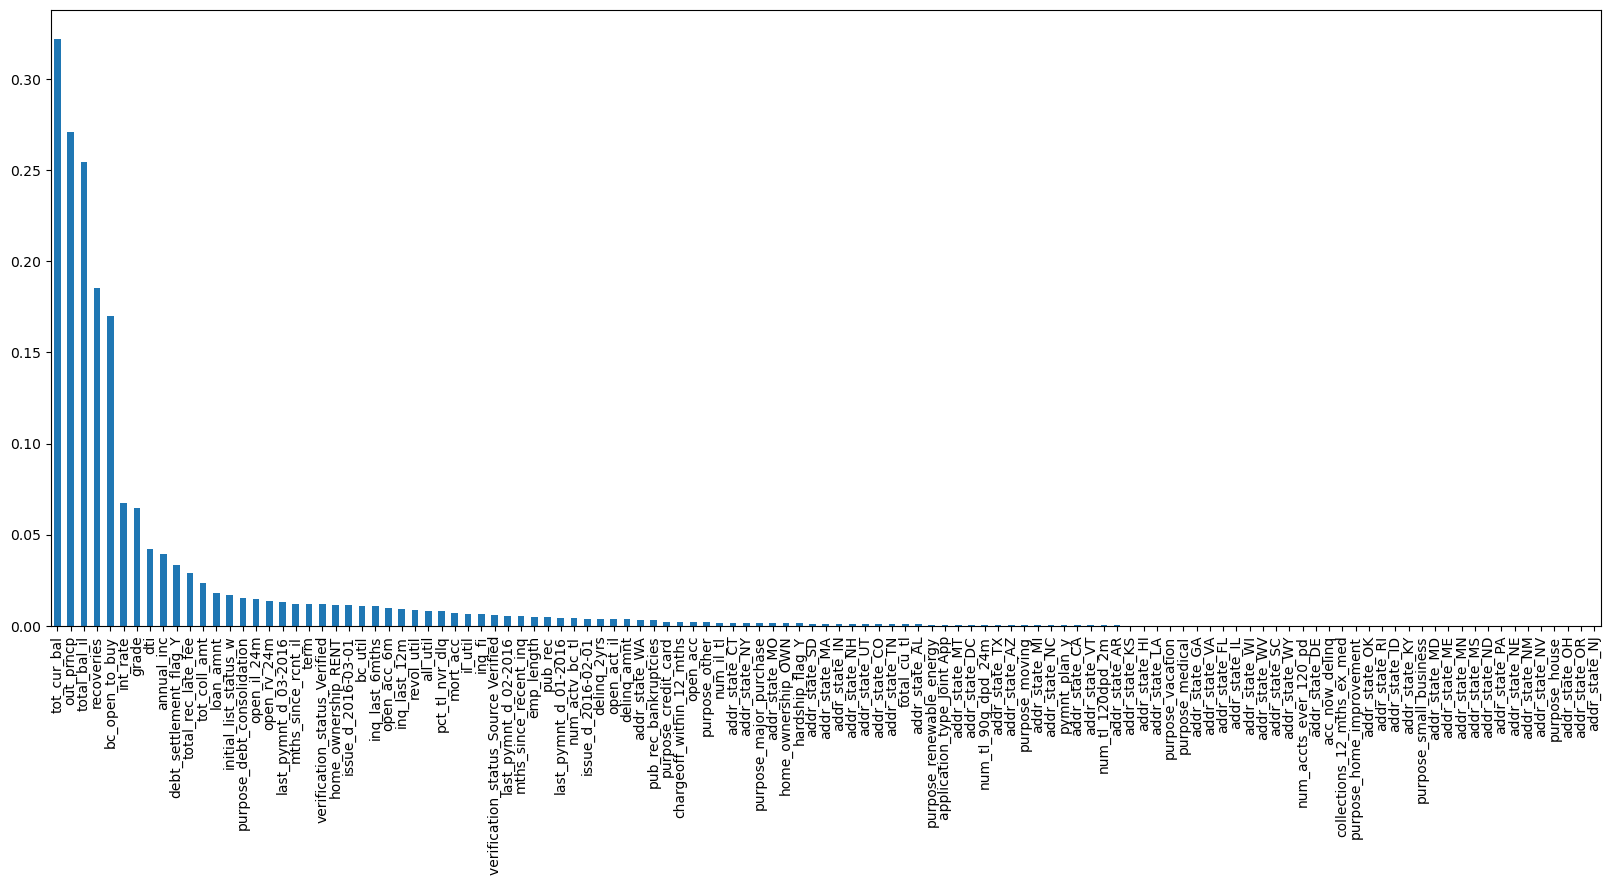

In [27]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [28]:
from sklearn.feature_selection import SelectKBest # picking the top features

In [29]:
sel_five_cols=SelectKBest(mutual_info_classif,k=5)
sel_five_cols.fit(X_train_1,y_train_1)
best_feature=list(X_train_1.columns[sel_five_cols.get_support()])

In [30]:
best_feature

['out_prncp', 'recoveries', 'tot_cur_bal', 'total_bal_il', 'bc_open_to_buy']

In [31]:
X_res_best=X_res[best_feature]

In [32]:
X_res_best.head()

,out_prncp,recoveries,tot_cur_bal,total_bal_il,bc_open_to_buy
0,-0.994238,-0.181158,-1.105081,-0.495642,-0.753524
1,-0.994238,-0.181158,0.359718,0.905144,-0.264580
2,1.454884,-0.181158,-0.934341,-0.352892,1.024598
3,1.315867,-0.181158,0.052052,-0.846918,0.758022
4,0.221054,-0.181158,-0.478709,0.097938,0.315445


In [33]:
y_res.head()

,loan_status
0,0
1,0
2,0
3,0
4,0


In [34]:
X_train_2,X_test_2,y_train_2,y_test_2=train_test_split(X_res_best,y_res,test_size=0.3,random_state=1)

# Score Card

In [35]:
score_card = pd.DataFrame(columns=['Model_Name','Train_score','Test_score', 'AUC_Score', 'Cohen_kappa_Score', 'Accuracy'])

# print the score card
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy


# Decision Tree Classifier

# model 1( using top 5 features selected by mutual info)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error

In [37]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0)
clf=clf.fit(X_train_2,y_train_2)
# prediction
y_pred_2=clf.predict(X_test_2)

# Checking accuracy // score

In [38]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

# Checking Fit

In [39]:
print("Train_score :",clf.score(X_train_2,y_train_1))
print("Test_score :",clf.score(X_test_2,y_test_1))

Train_score : 0.7655205703252637
Test_score : 0.7638981141883502


In [40]:
Accuracy_score=metrics.accuracy_score(y_test_2,y_pred_2)
Train_score=clf.score(X_train_2,y_train_1)
Test_score=clf.score(X_test_2,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_2,y_test_2)
AUC_score=round(metrics.roc_auc_score(y_test_2, y_pred_2),4)

In [41]:
Classification_model = pd.Series({
                     'Model_Name': "Decision Tree (Feature selected by Mutual Info)",
                        'Train_score':Train_score,
                        'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898


# Classification Report

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_2,y_pred_2))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78     34775
           1       0.80      0.69      0.75     34479

    accuracy                           0.76     69254
   macro avg       0.77      0.76      0.76     69254
weighted avg       0.77      0.76      0.76     69254



# Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_2,y_pred_2)

array([[28959,  5816],
       [10535, 23944]], dtype=int64)

# Decision Tree

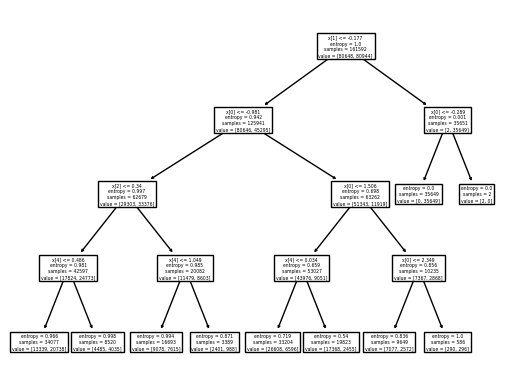

In [44]:
from sklearn import tree
tree.plot_tree(clf);

# selecting important feature for decision tree

# Model 2 (Using all features)

In [45]:
dt_full=DecisionTreeClassifier(random_state=10)
dt_full=dt_full.fit(X_train_1,y_train_1)
# prediction
y_pred_1=dt_full.predict(X_test_1)

In [46]:
print("Accuracy : ",metrics.accuracy_score(y_test_1,y_pred_1))

Accuracy :  0.9505876916856788


# Checking Fit

In [47]:
print("Train_score :",dt_full.score(X_train_1,y_train_1))
print("Test_score :",dt_full.score(X_test_1,y_test_1))

Train_score : 1.0
Test_score : 0.9505876916856788


In [48]:
#Over Fitt model 

In [49]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_1)
Train_score=dt_full.score(X_train_1,y_train_1)
Test_score=dt_full.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_1,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_1),4)

In [50]:
Classification_model = pd.Series({
                     'Model_Name': "Decision Tree (All features)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588


# Model 3 with best feature select by decision tree important feature

In [51]:
important_feature=pd.DataFrame({"feature ": X_res.columns,
                              "Importance": dt_full.feature_importances_})
important_feature.sort_values(by="Importance",ascending=False)

,feature,Importance
14,recoveries,0.281978
12,out_prncp,0.108495
2,int_rate,0.057537
13,total_rec_late_fee,0.036085
18,tot_cur_bal,0.032623
0,loan_amnt,0.029601
6,dti,0.028673
30,bc_open_to_buy,0.025390
5,annual_inc,0.024709
31,bc_util,0.019257


In [52]:
top_15=important_feature.sort_values(by="Importance",ascending=False).head(15)
top_feature=list(top_15["feature "])

In [53]:
X_best_dt=X_res[top_feature]
X_best_dt.head()

,recoveries,out_prncp,int_rate,total_rec_late_fee,tot_cur_bal,loan_amnt,dti,bc_open_to_buy,annual_inc,bc_util,revol_util,total_bal_il,mths_since_rcnt_il,il_util,mths_since_recent_inq
0,-0.181158,-0.994238,1.417657,-0.133718,-1.105081,-0.537453,-0.365133,-0.753524,-0.541819,-7.124747e-01,-0.662302,-0.495642,2.0,99.0,4.0
1,-0.181158,-0.994238,1.620208,-0.133718,0.359718,1.865089,0.646477,-0.264580,0.243110,2.883228e-01,-0.220191,0.905144,14.0,83.0,5.0
2,-0.181158,1.454884,-0.657506,-0.133718,-0.934341,0.605327,-0.513396,1.024598,0.069362,-2.014587e+00,-1.571315,-0.352892,46.0,38.0,3.0
3,-0.181158,1.315867,-0.120823,-0.133718,0.052052,0.350726,1.082318,0.758022,-0.836862,-1.411957e+00,-1.005248,-0.846918,37.0,74.0,5.0
4,-0.181158,0.221054,-0.657506,-0.133718,-0.478709,-0.828719,0.429861,0.315445,-0.043851,-6.371947e-15,1.932518,0.097938,9.0,75.0,9.0


In [54]:
X_train_3,X_test_3,y_train_3,y_test_3=train_test_split(X_best_dt,y_res,test_size=0.3,random_state=1)
dt=DecisionTreeClassifier(random_state=0,max_depth=4)
dt=dt.fit(X_train_3,y_train_3)
# prediction
y_pred_3=dt.predict(X_test_3)

# Accuracy score

In [55]:
print("Accuracy : ",metrics.accuracy_score(y_test_3,y_pred_3))

Accuracy :  0.8004447396540272


# Checking Fit

In [56]:
print("Train_score :",dt.score(X_train_3,y_train_3))
print("Test_score :",dt.score(X_test_3,y_test_3))

Train_score : 0.8011163919005891
Test_score : 0.8004447396540272


In [57]:
#better model

In [58]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_test_3,y_pred_3)

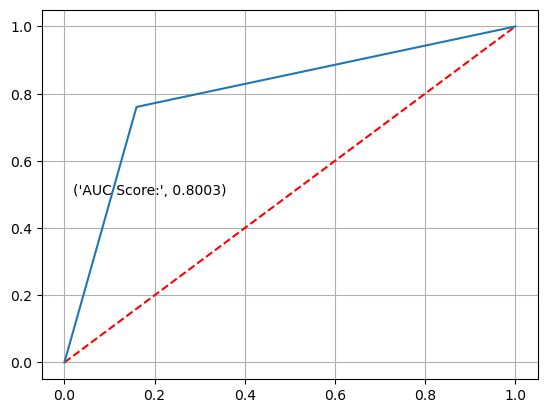

In [59]:
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

plt.text(x = 0.02, y = 0.5, s = ('AUC Score:',round(metrics.roc_auc_score(y_test_3, y_pred_3),4)))

plt.grid(True)

AUC is good but there is chance of improvment .

In [60]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_3)
Train_score=dt.score(X_train_3,y_train_1)
Test_score=dt.score(X_test_3,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_pred_3),4)

In [61]:
Classification_model = pd.Series({
                     'Model_Name': "Decision Tree (Imp Features)",
                     'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445


# Classification Report

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test_3,y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     34775
           1       0.82      0.76      0.79     34479

    accuracy                           0.80     69254
   macro avg       0.80      0.80      0.80     69254
weighted avg       0.80      0.80      0.80     69254



# Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_3,y_pred_3)

array([[29211,  5564],
       [ 8256, 26223]], dtype=int64)

# Tree

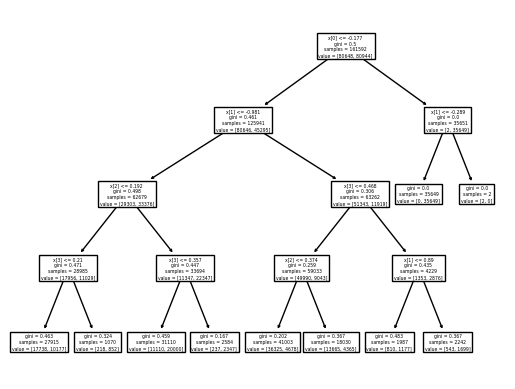

In [65]:
from sklearn import tree
tree.plot_tree(dt);

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
log_model=LogisticRegression()
log_model.fit(X_train_1,y_train_1)
y_predict_1=log_model.predict(X_test_1)

t=list(X_train_1.columns)

coef_df=pd.DataFrame(log_model.coef_,columns=t)
coef_df["intercept"]=log_model.intercept_
print(coef_df)

   loan_amnt      term  int_rate     grade  emp_length  annual_inc       dti  \
0   0.168308  0.017656  0.197798  0.112051    -0.01728   -0.059023  0.119515   

   delinq_2yrs  inq_last_6mths  open_acc   pub_rec  revol_util  out_prncp  \
0     0.006539        0.017123  0.037876  0.016304    0.008106  -1.013588   

   total_rec_late_fee  recoveries  collections_12_mths_ex_med  acc_now_delinq  \
0            0.529856    1.652624                    0.014159        0.000491   

   tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_24m  \
0     -0.009977    -0.150601     0.010385    -0.011412     0.031844   

   mths_since_rcnt_il  total_bal_il   il_util  open_rv_24m  all_util  \
0           -0.001045      0.007208 -0.000095     0.072143  0.002604   

     inq_fi  total_cu_tl  inq_last_12m  bc_open_to_buy   bc_util  \
0  0.020498    -0.017677      0.004679       -0.110882 -0.011896   

   chargeoff_within_12_mths  delinq_amnt  mort_acc  mths_since_recent_inq  \
0                  

In [68]:
model_score= log_model.score(X_test_1,y_test_1)
print(model_score)
print(metrics.confusion_matrix(y_test_1,y_predict_1))

0.8026106795275363
[[28837  5938]
 [ 7732 26747]]


In [69]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_predict_1)
Train_score=log_model.score(X_train_1,y_train_1)
Test_score=log_model.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_predict_1,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1, y_predict_1),4)

In [70]:
Classification_model = pd.Series({
                     'Model_Name': "logistic (best Features)",
                      'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611


# Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RF_model = RandomForestClassifier(random_state=1,max_depth=4)
RF_model.fit(X_train_1,y_train_1)
y_test_predict = RF_model.predict(X_test_1)

# Checking Fit of Model

In [73]:
print("Train_score :",RF_model.score(X_train_1,y_train_1))
print("Test_score :",RF_model.score(X_test_1,y_test_1))

Train_score : 0.7983377889994554
Test_score : 0.7970514338521962


In [74]:
print('Test report')
print(classification_report(y_test_1,y_test_predict))

Test report
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     34775
           1       0.81      0.77      0.79     34479

    accuracy                           0.80     69254
   macro avg       0.80      0.80      0.80     69254
weighted avg       0.80      0.80      0.80     69254



In [75]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_test_predict)
Train_score=RF_model.score(X_train_1,y_train_1)
Test_score=RF_model.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_test_predict,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_test_predict),4)

In [76]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (All feature)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
    
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051


# Random Forest with Important feature

In [77]:
imp_feat = pd.DataFrame({"Importance":RF_model.feature_importances_,'Feature':X_train_1.columns})
imp_feature = imp_feat.sort_values(by='Importance',ascending=False)[:15]['Feature']

In [78]:
imp=list(imp_feature)

In [79]:
X_train_4=X_train_1[imp]
X_test_4=X_test_1[imp]

In [80]:
RF_model_2 = RandomForestClassifier(random_state=1,max_features='auto').fit(X_train_4,y_train_1)

In [81]:
y_pred_RF2 = RF_model_2.predict(X_test_4)

# Checking Fit 

In [82]:
print("Train_score :",RF_model_2.score(X_train_4,y_train_1))
print("Test_score :",round(RF_model_2.score(X_test_4,y_test_1),3))

Train_score : 1.0
Test_score : 0.985


In [83]:
print('Test report')
print(classification_report(y_test_1,y_pred_RF2))

Test report
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     34775
           1       0.97      1.00      0.98     34479

    accuracy                           0.98     69254
   macro avg       0.98      0.98      0.98     69254
weighted avg       0.99      0.98      0.98     69254



In [84]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_RF2)
Train_score=RF_model_2.score(X_train_4,y_train_1)
Test_score=RF_model_2.score(X_test_4,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_RF2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_RF2),4)

In [85]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (Imp Feature)",
                      'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795


# Grid Search CV for Finding the best perameters for our model

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param=[{"max_depth": [None,3,4,5,6],
       "max_features":['auto', 'sqrt', 'log2']}]
clf=GridSearchCV(RF_model_2,param,cv=10,scoring="accuracy")
clf.fit(X_train_4,y_train_1)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='auto',
                                              random_state=1),
             param_grid=[{'max_depth': [None, 3, 4, 5, 6],
                          'max_features': ['auto', 'sqrt', 'log2']}],
             scoring='accuracy')

In [88]:
print(clf.best_params_)

{'max_depth': None, 'max_features': 'auto'}


In [89]:
print(clf.best_score_)

0.9817008266092095


In [90]:
model_RF_3=RandomForestClassifier(random_state=40,max_depth=None,max_features="auto").fit(X_train_4,y_train_1)

In [91]:
y_pred_RF3=model_RF_3.predict(X_test_4)
print(classification_report(y_test_1,y_pred_RF3))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     34775
           1       0.98      1.00      0.99     34479

    accuracy                           0.99     69254
   macro avg       0.99      0.99      0.99     69254
weighted avg       0.99      0.99      0.99     69254



# Checking Fit

In [92]:
print("Train_score :",model_RF_3.score(X_train_4,y_train_1))
print("Test_score :",round(model_RF_3.score(X_test_4,y_test_1)))

Train_score : 1.0
Test_score : 1


In [93]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_RF3)
Train_score=model_RF_3.score(X_train_4,y_train_1)
Test_score=model_RF_3.score(X_test_4,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_RF3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_RF3),4)

In [94]:
Classification_model = pd.Series({
                     'Model_Name': "Random Forest (Using Grid Search CV)",
                     'Train_score':Train_score,
                     'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618


# Let's try the Boosting Technique

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=1).fit(X_train_1,y_train_1)

# Checking the Fit

In [96]:
print("Train_score :",ada.score(X_train_1,y_train_1))
print("Test_score :",ada.score(X_test_1,y_test_1))

Train_score : 0.8149537105797316
Test_score : 0.8132815433043579


In [97]:
y_pred_ada=ada.predict(X_test_1)
print(classification_report(y_test_1,y_pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     34775
           1       0.84      0.77      0.80     34479

    accuracy                           0.81     69254
   macro avg       0.82      0.81      0.81     69254
weighted avg       0.82      0.81      0.81     69254



In [98]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada)
Train_score=ada.score(X_train_1,y_train_1)
Test_score=ada.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada),4)

In [99]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (All feature)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282


# AdaBoost Hyperparameters Tune

In [100]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1]
             }

In [105]:
grid_search = RandomizedSearchCV(estimator=ada, param_distributions=param_grid, n_jobs=1, cv=5, scoring='accuracy')

In [106]:
grid_search.fit(X_train_1,y_train_1)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring='accuracy')

In [107]:
print(grid_search.best_params_)

{'n_estimators': 100, 'learning_rate': 1}


In [108]:
print(grid_search.best_score_)

0.8161913942693324


In [109]:
ada1=AdaBoostClassifier(random_state=1,learning_rate=1,n_estimators=100).fit(X_train_1,y_train_1)

# Checking Fit

In [110]:
print("Train_score :",ada1.score(X_train_1,y_train_1))
print("Test_score :",ada1.score(X_test_1,y_test_1))

Train_score : 0.817255804742809
Test_score : 0.8147977012158143


In [111]:
y_pred_ada1=ada1.predict(X_test_1)
print(classification_report(y_test_1,y_pred_ada1))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     34775
           1       0.84      0.77      0.81     34479

    accuracy                           0.81     69254
   macro avg       0.82      0.81      0.81     69254
weighted avg       0.82      0.81      0.81     69254



In [112]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada1)
Train_score=ada1.score(X_train_1,y_train_1)
Test_score=ada1.score(X_test_1,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada1,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada1),4)

In [113]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (All feature using RandomizedSearchCV)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282
8,Ada Boost (All feature using RandomizedSearchCV),0.817256,0.814798,0.8146,0.629458,0.814798


# Feature Selection

In [114]:
X_train_1.shape

(161592, 117)

In [115]:
X_train_4.shape

(161592, 15)

In [116]:
import matplotlib.cm as cm
from sklearn.feature_selection import RFE

In [117]:
rfe=RFE(RF_model_2,n_features_to_select=5,step=1)
rfe.fit(X_train_4,y_train_1)

RFE(estimator=RandomForestClassifier(max_features='auto', random_state=1),
    n_features_to_select=5)

In [118]:
rfe.ranking_

array([ 1,  1,  6,  2, 10,  7,  5,  8,  1,  1, 11,  4,  9,  1,  3])

In [119]:
from operator import itemgetter

In [120]:
features = X_train_1.columns.to_list()
top_10=[]
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    top_10.append(y)

1 loan_amnt
1 term
1 inq_last_6mths
1 open_acc
1 total_rec_late_fee
2 grade
3 recoveries
4 revol_util
5 dti
6 int_rate
7 annual_inc
8 delinq_2yrs
9 out_prncp
10 emp_length
11 pub_rec


# Selecting feature rank 1

In [126]:
rfe_feature=['loan_amnt',
 'term',
 'inq_last_6mths',
 'open_acc',
 'total_rec_late_fee',
'grade']

In [127]:
X_train_5=X_train_1[rfe_feature]
X_test_5=X_test_1[rfe_feature]

In [128]:
X_test_5.head()

,loan_amnt,term,inq_last_6mths,open_acc,total_rec_late_fee,grade
35085,-0.274128,60,2.0,2.408721,-0.133718,2
100073,0.193414,60,0.0,0.326265,-0.133718,1
95816,-2.062544,36,0.0,-1.409115,-0.133718,2
186727,-1.535194,36,1.0,-1.062039,-0.133718,4
50832,-1.384935,36,0.0,2.061645,-0.133718,2


In [129]:
ada2=AdaBoostClassifier(random_state=1).fit(X_train_5,y_train_1)

In [130]:
param_grid = {"n_estimators": [40,50,80,100,120],
              "learning_rate":[0.01,.1,1]
             }
rs_model=RandomizedSearchCV(ada2,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [131]:
rs_model.fit(X_train_5,y_train_1)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1],
                                        'n_estimators': [40, 50, 80, 100, 120]},
                   scoring='accuracy', verbose=3)

In [132]:
rs_model.best_params_

{'n_estimators': 50, 'learning_rate': 1}

In [133]:
ada_2=AdaBoostClassifier(random_state=1,n_estimators=50,learning_rate=1).fit(X_train_5,y_train_1)

# Checking Fit

In [134]:
print("Train_score :",ada_2.score(X_train_5,y_train_1))
print("Test_score :",ada_2.score(X_test_5,y_test_1))

Train_score : 0.6622976384969553
Test_score : 0.6650446183613943


In [136]:
y_pred_ada_2=ada_2.predict(X_test_5)
print(classification_report(y_test_1,y_pred_ada_2))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66     34775
           1       0.66      0.69      0.67     34479

    accuracy                           0.67     69254
   macro avg       0.67      0.67      0.66     69254
weighted avg       0.67      0.67      0.66     69254



In [138]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_ada_2)
Train_score=ada_2.score(X_train_5,y_train_1)
Test_score=ada_2.score(X_test_5,y_test_1)
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_ada_2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_ada_2),4)

In [139]:
Classification_model = pd.Series({
                     'Model_Name': "Ada Boost (RFE) using RandomizedSearchCV",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282
8,Ada Boost (All feature using RandomizedSearchCV),0.817256,0.814798,0.8146,0.629458,0.814798
9,Ada Boost (RFE) using RandomizedSearchCV,0.662298,0.665045,0.6652,0.330230,0.665045


# Xgboost with all Numeric features

In [140]:
from xgboost import XGBClassifier

In [141]:
xgb_model = XGBClassifier()
y_pred_xgb = xgb_model.fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C')).predict(X_test_1._get_numeric_data())
print(classification_report(y_test_1, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     34775
           1       0.88      0.86      0.87     34479

    accuracy                           0.87     69254
   macro avg       0.87      0.87      0.87     69254
weighted avg       0.87      0.87      0.87     69254



In [142]:
print("Train_score :",xgb_model.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.8862567453834348
Test_score : 0.8696970572096918


In [143]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb)
Train_score=xgb_model.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb),4)

In [144]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(All Num Feature)",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282
8,Ada Boost (All feature using RandomizedSearchCV),0.817256,0.814798,0.8146,0.629458,0.814798
9,Ada Boost (RFE) using RandomizedSearchCV,0.662298,0.665045,0.6652,0.330230,0.665045


# XGBOOST using RandomizedsearchCV with all Numeric Feature

In [145]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
              
             }
rs_model=RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [146]:
rs_model.fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [None, 3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring='accuracy', verbose=3)

In [147]:
print(rs_model.best_params_)

{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 1, 'gamma': 0.3, 'colsample_bytree': 0.4}


In [148]:
xgb_model2=XGBClassifier(n_estimators=80,max_depth =6,min_child_weight=3,learning_rate=1,gamma=0.4,colsample_bytree=0.4).fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C'))

In [149]:
y_pred_xgb2=xgb_model2.predict(X_test_1._get_numeric_data())
print(classification_report(y_test_1,y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     34775
           1       0.87      0.88      0.88     34479

    accuracy                           0.88     69254
   macro avg       0.88      0.88      0.88     69254
weighted avg       0.88      0.88      0.88     69254



In [150]:
print("Train_score :",xgb_model2.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model2.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.9077615228476658
Test_score : 0.8774655615560112


In [151]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb2)
Train_score=xgb_model2.score(X_train_1._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model2.score(X_test_1._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb2,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb2),4)

In [152]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(All Num Feature) using randomizedsearchcv",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282
8,Ada Boost (All feature using RandomizedSearchCV),0.817256,0.814798,0.8146,0.629458,0.814798
9,Ada Boost (RFE) using RandomizedSearchCV,0.662298,0.665045,0.6652,0.330230,0.665045


# XGBOOST With RFE Using RandomizedSearchCV

In [153]:
rfe=RFE(xgb_model2,n_features_to_select=5,step=1)
rfe.fit(X_train_1._get_numeric_data(), np.ravel(y_train_1, order='C'))

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=0.4, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=0.4, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=1,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=6, max_leaves=None, min_child_weight=3,
                            missing=nan, monotone_constraints=None,
                            n_estimators=80, n_jobs=None,
                            num_parallel_tree=None, predictor=None,
                            random_state=None, ...),
    n_features_to_select=5)

In [154]:
features = X_train_1._get_numeric_data().columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)
    top_10.append(y)

1 grade
1 out_prncp
1 recoveries
1 hardship_flag_Y
1 debt_settlement_flag_Y
2 total_rec_late_fee
3 loan_amnt
4 tot_cur_bal
5 dti
6 open_rv_24m
7 total_bal_il
8 last_pymnt_d_01-2016
9 issue_d_2016-03-01
10 addr_state_NJ
11 int_rate
12 revol_util
13 application_type_Joint App
14 collections_12_mths_ex_med
15 addr_state_AZ
16 annual_inc
17 open_acc
18 pub_rec
19 tot_coll_amt
20 open_acc_6m
21 pct_tl_nvr_dlq
22 bc_open_to_buy
23 total_cu_tl
24 addr_state_ND
25 inq_fi
26 all_util
27 il_util
28 mths_since_rcnt_il
29 inq_last_6mths
30 purpose_medical
31 addr_state_NY
32 home_ownership_RENT
33 pub_rec_bankruptcies
34 delinq_2yrs
35 addr_state_MA
36 addr_state_CO
37 addr_state_OR
38 last_pymnt_d_03-2016
39 num_actv_bc_tl
40 bc_util
41 initial_list_status_w
42 num_accts_ever_120_pd
43 mths_since_recent_inq
44 mort_acc
45 open_il_24m
46 purpose_small_business
47 num_il_tl
48 open_act_il
49 addr_state_HI
50 issue_d_2016-02-01
51 purpose_credit_card
52 addr_state_GA
53 inq_last_12m
54 addr_state_WA

In [156]:
rfe_best=["grade",
"out_prncp",
"recoveries",
"hardship_flag_Y",
"debt_settlement_flag_Y",
"total_rec_late_fee",
"loan_amnt",
"tot_cur_bal",
"dti",
"open_rv_24m",
"total_bal_il",
"last_pymnt_d_01-2016",
"int_rate",
"revol_util"]

In [157]:
X_train_6=X_train_1[rfe_best]
X_test_6=X_test_1[rfe_best]

In [158]:
param_grid = {"n_estimators": [40,50,80,100],
              "learning_rate":[0.01,.1,1,1.5,2],
              "max_depth" : [None,3, 4, 5, 6],
              "min_child_weight" : [  5, 7,8,9,10,12,15,18,20 ],
              "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.8,0.9,1]   
             }
rs_model=RandomizedSearchCV(xgb_model,param_distributions=param_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [159]:
rs_model.fit(X_train_6._get_numeric_data(), np.ravel(y_train_1, order='C'))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7,
                                                             0.8, 0.9, 1],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 1, 1.5, 2],
                                        'max_depth': [None, 3, 4, 5, 6],
                                        'min_child_weight': [5, 7, 8, 9, 10, 12,
                                                             15, 18, 20],
                                        'n_estimators': [40, 50, 80, 100]},
                   scoring='accuracy', verbose=3)

In [160]:
rs_model.best_params_

{'n_estimators': 100,
 'min_child_weight': 10,
 'max_depth': 6,
 'learning_rate': 1.5,
 'gamma': 0.1,
 'colsample_bytree': 0.8}

In [161]:
xgb_model3=XGBClassifier(n_estimators=100,max_depth =6,min_child_weight=10,learning_rate=1,gamma=0.1,colsample_bytree=0.8).fit(X_train_6._get_numeric_data(), np.ravel(y_train_1, order='C'))

In [162]:
y_pred_xgb3=xgb_model3.predict(X_test_6._get_numeric_data())
print(classification_report(y_test_1,y_pred_xgb3))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89     34775
           1       0.88      0.90      0.89     34479

    accuracy                           0.89     69254
   macro avg       0.89      0.89      0.89     69254
weighted avg       0.89      0.89      0.89     69254



In [163]:
print("Train_score :",xgb_model3.score(X_train_6._get_numeric_data(),np.ravel(y_train_1, order='C')))
print("Test_score :",xgb_model3.score(X_test_6._get_numeric_data(),np.ravel(y_test_1, order='C')))

Train_score : 0.9102616466161692
Test_score : 0.8869956969994512


In [164]:
Accuracy_score=metrics.accuracy_score(y_test_1,y_pred_xgb3)
Train_score=xgb_model3.score(X_train_6._get_numeric_data(),np.ravel(y_train_1, order='C'))
Test_score=xgb_model3.score(X_test_6._get_numeric_data(),np.ravel(y_test_1, order='C'))
cohen_kappa_score=metrics.cohen_kappa_score(y_pred_xgb3,y_test_1)
AUC_score=round(metrics.roc_auc_score(y_test_1,y_pred_xgb3),4)

In [165]:
Classification_model = pd.Series({
                     'Model_Name': "XGBOOST(RFE) using randomizedsearchcv",
                    'Train_score':Train_score,
                    'Test_score':Test_score,
                     'AUC_Score':AUC_score,
                     'Cohen_kappa_Score': cohen_kappa_score,
                     'Accuracy': Accuracy_score
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(Classification_model, ignore_index=True)

# print the result table
score_card

,Model_Name,Train_score,Test_score,AUC_Score,Cohen_kappa_Score,Accuracy
0,Decision Tree (Feature selected by Mutual Info),0.765521,0.763898,0.7636,0.527512,0.763898
1,Decision Tree (All features),1.000000,0.950588,0.9508,0.901212,0.950588
2,Decision Tree (Imp Features),0.801116,0.800445,0.8003,0.600750,0.800445
3,logistic (best Features),0.802843,0.802611,0.8025,0.605127,0.802611
4,Random Forest (All feature),0.798338,0.797051,0.7969,0.594007,0.797051
5,Random Forest (Imp Feature),1.000000,0.984795,0.9848,0.969592,0.984795
6,Random Forest (Using Grid Search CV),1.000000,0.985618,0.9857,0.971238,0.985618
7,Ada Boost (All feature),0.814954,0.813282,0.8131,0.626406,0.813282
8,Ada Boost (All feature using RandomizedSearchCV),0.817256,0.814798,0.8146,0.629458,0.814798
9,Ada Boost (RFE) using RandomizedSearchCV,0.662298,0.665045,0.6652,0.330230,0.665045


# Summarize

# Score Card

In [1]:
score_card

NameError: name 'score_card' is not defined

From the about score card, I can clearly conclude that the random forest with best feature using Grid search CV is the best model for our project.

Campering the base model fit with final model

In [ ]:
print("Train_score :",dt_full.score(X_train_1,y_train_1))
print("Test_score :",round(dt_full.score(X_test_1,y_test_1),2))

It is highly overfit model 

Let's check the training and testing score of the final model

In [ ]:
print("Train_score :",model_RF_3.score(X_train_4,y_train_1))
print("Test_score :",round(model_RF_3.score(X_test_4,y_test_1),2))

So from the score, I conclude that our model performing best in the train and better than the base model in the test , mean it is a best fit model.

Let's compare the Roc curve of base model and the final model.

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test_1,y_pred_1)
fpr1,tpr1,thresholds1=roc_curve(y_test_1,y_pred_RF3)

In [ ]:
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr, tpr)

plt.text(x = 0.15, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test_1, y_pred_1),2)))
plt.title("Base Model")
plt.grid(True)

plt.subplot(1, 2, 2)
# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# plot the ROC curve
plt.plot(fpr1, tpr1)

plt.text(x = 0.15, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test_1, y_pred_RF3),2)))
plt.title("Final Model")
plt.grid(True)

From here also I can say that our final model performing better than the base model. Cause Auc score final model is 0.99 which is greater than 0.95.

Lets see the important feature, what we get from our final model.

In [ ]:
for i,j in zip(range(1,16),X_train_4.columns):
    print(i,"Feature :",j)